## Code for policy section

In [94]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

# Ensure type 1 fonts are used
mlp.rcParams['ps.useafm'] = True
mlp.rcParams['pdf.use14corefonts'] = True
mlp.rcParams['text.usetex'] = True

import seaborn as sns
import pandas as pd
import pickle
import itertools as it

## Solve for the final size of the outbreak in Lombardy, Italy

In [95]:
# Estimate based on the value of the basic reproduction number as provided by best fit 
# For formula, see here: https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf
from sympy import Symbol, solve, log

x = Symbol('x')
r0 = 3.16
s_inf = solve(log(x)-r0_max*(x-1),x)[0]

print("% of the population that is still susceptible by the end of the outbreak in Lombardy, Italy: {0:10.4f}".format(s_inf*100))
print("% of the population that has ever been infected by the end of the outbreak in Lombardy, Italy: {0:10.4f}".format(100-s_inf*100))

% of the population that is still susceptible by the end of the outbreak in Lombardy, Italy:     4.9629
% of the population that has ever been infected by the end of the outbreak in Lombardy, Italy:    95.0371


In [96]:
# Set of colors
# For age group policies
color_list_shahin = ['orange','green','blue','purple','black']
# For additional baseline policies (50% or 100% of the population being asked to shelter-in-place)
color_list_add = ['dodgerblue','hotpink']

In [97]:
# Number of distinct ages in the UN age distribution
# Currently ages 0-100, with each age counted separately
n_ages = 101

# Shelter-in-place probabilities per age group, equivalent to 1 million of the considered generation in each case
age_ranges = [(0,14), (15,29), (30,49), (50,69), (70,100)]
isolation_rates_by_age = [0.803689, 0.713332, 0.380842, 0.358301, 0.516221]

# Learn about the structure of the folder containing the simulation results
all_possible_combos = []

for a, iso_rate in zip(age_ranges, isolation_rates_by_age):
    combo = np.zeros(n_ages)
    combo[a[0]:a[1]+1] = iso_rate
    all_possible_combos.append(combo)
    
# Two possibilities for mean time to isolation: either 4.6 days (default value) or a large number to mimic no isolation in place
mean_time_to_isolations = [4.6, 10000]
all_possible_combos = list(it.product(mean_time_to_isolations, all_possible_combos))
NUM_COMBOS = len(all_possible_combos)
print("NUM COMBOS:",NUM_COMBOS)

NUM COMBOS: 10


In [98]:
mtti_val_even = all_possible_combos[0][0]
combo_frac_stay_home_even = all_possible_combos[0][1]
mtti_val_odd = all_possible_combos[1][0]
combo_frac_stay_home_odd = all_possible_combos[1][1]

print("Value of mean time to isolation - even index: ", mtti_val_even)
print("Combo fraction stay home - even index", combo_frac_stay_home_even)

print("Value of mean time to isolation - odd index: ", mtti_val_odd)
print("Combo fraction stay home - odd index: ", combo_frac_stay_home_odd)

Value of mean time to isolation - even index:  4.6
Combo fraction stay home - even index [0.803689 0.803689 0.803689 0.803689 0.803689 0.803689 0.803689 0.803689
 0.803689 0.803689 0.803689 0.803689 0.803689 0.803689 0.803689 0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.      ]
Value of mean time to isolation - odd index:  4.6
Comb

In [99]:
# Learn about the structure of the folder containing the simulation results
all_possible_combos = []

for a in age_ranges:
    # Either 50% or 100% of the population in each age group is asked to shelter-in-place
    for val in [0.5, 1.0]:
        combo = np.zeros(n_ages)
        combo[a[0]:a[1]+1]=val
        all_possible_combos.append(combo)

# Two possibilities for mean time to isolation: either 4.6 days (default value) or a large number to mimic no isolation in place
mean_time_to_isolations = [4.6, 10000]
all_possible_combos = list(it.product(mean_time_to_isolations, all_possible_combos))
NUM_COMBOS = len(all_possible_combos)
print("NUM COMBOS:",NUM_COMBOS)

NUM COMBOS: 20


In [100]:
mtti_val_even = all_possible_combos[0][0]
combo_frac_stay_home_even = all_possible_combos[0][1]

mtti_val_odd = all_possible_combos[1][0]
combo_frac_stay_home_odd = all_possible_combos[1][1]

print("Value of mean time to isolation - even index: ", mtti_val_even)
print("Combo fraction stay home - even index: ", combo_frac_stay_home_even)

print("Value of mean time to isolation - odd index: ", mtti_val_even)
print("Combo fraction stay home - odd index: ", combo_frac_stay_home_even)

Value of mean time to isolation - even index:  4.6
Combo fraction stay home - even index:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Value of mean time to isolation - odd index:  4.6
Combo fraction stay home - odd index:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [101]:
# Set font sizes for plots
legend_fontsize = 13
title_fontsize = 15
xlab_fontsize = 23
ylab_fontsize = 23
xtick_fontsize = 17
ytick_fontsize = 17

## Functions to be used to plot four subgraphs in Figure 8

### Function to be used to plot the projected percentage of infected people in the population over time, in the absence of physical distancing
### Figures 8(a) and 8(b)

In [114]:
def perc_infected_age_group_node_removal(pop_size, group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder1, folder2, filename1, filename2, option, specific_title):
    if option == 2:
        nb = 0
        
        # baseline
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        Infected_Trials = np.zeros((n_sims,sim_end+1))
        for i in range(n_sims):
                Mild = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                Severe = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                Critical = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                R = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                D = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                Infected_Trials[i,:] = Mild+Severe+Critical+R+D
        Infected_Trials = Infected_Trials.mean(axis=0)
        Infected_Trials = Infected_Trials/pop_size*100.

        print("Baseline 0: No intervention")
        print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
        print("% infected today: ", Infected_Trials[today])
        print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
        
        plt.plot(Infected_Trials,color='gray',linestyle='-.')
        
        for j in range(combo_start,combo_end,2):
                nb +=1
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    if i < 50:
                        folder = folder1
                        filename = filename1
                    else: 
                        folder = folder2
                        filename = filename2
                    Mild = pd.read_csv( folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D 

                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.

                print("Age group: ", group_vec_age[nb-1])
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                
                plt.plot(Infected_Trials,color=color_list_shahin[nb-1])                
                
        # new baseline - 50% population is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):                
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):                  
                    Mild = pd.read_csv( base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D

                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.
                
                print("Baseline: ", j-1)
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                
                plt.plot(Infected_Trials,color=color_list_add[j-2],linestyle='-.')       
            
        plt.axvline(t_lockdown_vec[0], 0,color='red',linestyle='--')
        plt.legend(['Absence of\n intervention']+['Ages ' + str(group_vec_age[i]) for i in range(len(group_vec_age))]+['All ages\n50\% confined','All ages\n100\% confined'], fontsize = 13)
        plt.ylim(0,100)
        plt.title(specific_title,fontsize=15)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.ylabel('Percentage of infected', fontsize=23)
        plt.xlabel('Days since patient zero', fontsize=23)
        
        return(plt)
    
    elif option == 1:
        nb = 0
        
        # baseline
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        Infected_Trials=np.zeros((n_sims,sim_end+1))
        for i in range(n_sims):
                Mild = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                Severe = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                Critical = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                R = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                D = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                Infected_Trials[i,:] = Mild+Severe+Critical+R+D 
        Infected_Trials = Infected_Trials.mean(axis=0)
        Infected_Trials = Infected_Trials/pop_size*100.

        print("Baseline 0: No intervention")
        print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])        
        print("% infected today: ", Infected_Trials[today])
        print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
        
        plt.plot(Infected_Trials,color='gray',linestyle='-.')
        
        for j in range(combo_start+1,combo_end,2):
                nb +=1
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    if i < 50:
                        folder = folder1
                        filename = filename1
                    else: 
                        folder = folder2
                        filename = filename2
                    Mild = pd.read_csv( folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D
                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.

                print("Age group: ", group_vec_age[nb-1])
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                
                plt.plot(Infected_Trials,color=color_list_shahin[nb-1])
                
        # new baseline - 50% population is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):                
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Mild = pd.read_csv( base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D
                    
                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.
                
                print("Baseline: ", j-1)
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                plt.plot(Infected_Trials,color=color_list_add[j-2],linestyle='-.')

        plt.axvline(t_lockdown_vec[0], 0,color='red',linestyle='--')
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(len(group_vec_age))]+['All ages\n50\% confined','All ages\n100\% confined'], fontsize = 13)
        plt.ylim(0,100)
        plt.title(specific_title,fontsize=15)
        plt.ylabel('Percentage of infected', fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Days since patient zero', fontsize=23)
        
        return(plt)
    
    else: 
        nb = 0
        
        # baseline
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        Infected_Trials=np.zeros((100,sim_end+1))
        for i in range(100):
                Mild = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                Documented = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_documented.csv',delimiter='	',header=None)
                Severe = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                Critical = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                R = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                D = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                Infected_Trials[i,:] = Mild+Severe+Critical+R+D
        Infected_Trials = Infected_Trials.mean(axis=0)
        Infected_Trials = Infected_Trials/pop_size*100.
        
        print("Baseline 0: No intervention")
        print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
        print("% infected today: ", Infected_Trials[today])
        print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
        plt.plot(Infected_Trials,color='gray',linestyle='-.')
        
        for j in range(combo_start,combo_end):
            nb +=1
            Infected_Trials = np.zeros((n_sims,sim_end+1))
            for i in range(n_sims):
                if i < 50:
                    folder = folder1
                    filename = filename1
                else: 
                    folder = folder2
                    filename = filename2
                Mild = pd.read_csv( folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                Severe = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                Critical = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                R = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                D = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                Infected_Trials[i,:] = Mild+Severe+Critical+R+D
            Infected_Trials = Infected_Trials.mean(axis=0)
            Infected_Trials = Infected_Trials/pop_size

            print("Age group: ", group_vec_age[nb-1])
            print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
            print("% infected today: ", Infected_Trials[today])
            print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
            plt.plot(Infected_Trials,color=color_list_shahin[nb-1])
            
        # new baseline - 50% population is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):
                
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Mild = pd.read_csv( base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D
                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.
                
                print("Baseline: ", j-1)
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                plt.plot(Infected_Trials,color=color_list_add[j-2],linestyle='-.')

        plt.axvline(t_lockdown_vec[0], 0,color='red',linestyle='--')
        plt.ylim(0,100)
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(5)]+['All ages\n50\% confined','All ages\n100\% confined'], fontsize = 13)
        plt.title(specific_title, fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.ylabel('Percentage of infected', fontsize=23)
        plt.xlabel('Days since patient zero', fontsize=23)
        
        return(plt)

### Function to be used to plot the projected number of deaths over time, in the absence of physical distancing
### Figures 8(c) and 8(d)

In [103]:
def death_age_group_node_removal(group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, 
                                 folder1, folder2, filename1, filename2, option, specific_title):
    if option == 2:
        nb = 0
        
        # Baseline - No intervention
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        D=np.zeros((n_sims,sim_end+1))
        for i in range(n_sims):
            Deaths = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv', delimiter='	',header=None)
            D[i,:]=Deaths
        D = D.mean(axis=0)
        
        print("Baseline 0: No intervention")                        
        print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]])
        print("# of deaths today: ", D[today])
        print("# of deaths at the end of the simulation: ", D[sim_end])
        
        D = D/1000.        
        plt.plot(D,color='gray',linestyle='-.')
        
        for j in range(combo_start,combo_end,2):
                nb +=1
                D = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    if i < 50:
                        folder = folder1
                        filename = filename1
                    else: 
                        folder = folder2
                        filename = filename2
                    Deaths = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_deaths.csv', delimiter='	',header=None)
                    D[i,:] = Deaths
                D = D.mean(axis=0)
                
                print("Age group: ", group_vec_age[nb-1])
                print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]])              
                print("# of deaths today : ", D[today])           
                print("# of deaths at the end of the simulation: ", D[sim_end])
                
                D = D/1000.
                plt.plot(D,color=color_list_shahin[nb-1])
                
        # Additional baselines - 50% and 100% of population stays home
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):                
            D = np.zeros((n_sims,sim_end+1))
            for i in range(n_sims):
                Deaths = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv', delimiter='	',header=None)
                D[i,:]=Deaths
                
            D = D.mean(axis=0)
            print("Baseline: ", j-1)                
            print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]])  
            print("# of deaths today: ", D[today])
            print("# of deaths at the end of the simulation: ", D[sim_end])                
               
            D = D/1000.                
            plt.plot(D,color=color_list_add[j-2], linestyle='-.')

        plt.axvline(t_lockdown_vec[0], 0, color='red', linestyle='--')
        plt.legend(['Absence of\n intervention']+['Ages ' + str(group_vec_age[i]) for i in range(len(group_vec_age))]+['All ages\n50\% confined','All ages\n100\% confined'], fontsize=legend_fontsize)
        plt.ylim(0,400)
        plt.title(specific_title, fontsize=title_fontsize)
        plt.xlabel('Days since patient zero', fontsize=xlab_fontsize)
        plt.ylabel('Total deaths (thousands)', fontsize=ylab_fontsize)
        plt.xticks(fontsize=xtick_fontsize)
        plt.yticks(fontsize=ytick_fontsize)
        
        return(plt)
    
    elif option == 1:
        nb = 0
        
        # Baseline - No intervention
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        D = np.zeros((n_sims,sim_end+1))
        for i in range(n_sims):
            Deaths = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv', delimiter='	', header=None)
            D[i,:]=Deaths        
        D = D.mean(axis=0)
        
        print("Baseline 0: No intervention")
        print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]])
        print("# of deaths today: ", D[today])
        print("# of deaths at the end of the simulation: ", D[sim_end])
        D = D/1000.        
        plt.plot(D,color='gray',linestyle='-.')
        
        # Average simulations per age group over n_sims random seeds
        for j in range(combo_start+1,combo_end,2):
                nb +=1
                D = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    if i < 50:
                        folder = folder1
                        filename = filename1
                    else: 
                        folder = folder2
                        filename = filename2
                    Deaths = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_deaths.csv', delimiter='	',header=None)
                    D[i,:] = Deaths

                D = D.mean(axis=0)
                print("Age group: ", group_vec_age[nb-1])
                print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]])
                print("# of deaths today: ", D[today])
                print("# of deaths at the end of the simulatuon: ", D[today])
                
                D = D/1000.
                plt.plot(D,color=color_list_shahin[nb-1])
                
        # Additional baselines - 50% and 100% of population stays home
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):
                
                D = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Deaths = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    D[i,:]=Deaths
                
                D = D.mean(axis=0)
                print("Baseline: ", j-1)
                print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]])
                print("# of deaths today: ", D[today])
                print("# of deaths at the end of the simulation: ", D[sim_end])
                
                D = D/1000.                
                plt.plot(D,color=color_list_add[j-2],linestyle='-.')

        plt.axvline(t_lockdown_vec[0], 0,color='red',linestyle='--')
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(5)]+['All ages\n50\% confined','All ages\n100\% confined'], fontsize = 13)
        plt.ylim(0,400)
        plt.title(specific_title,fontsize=15)
        plt.ylabel('Total deaths (thousands)', fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Days since patient zero', fontsize=23)
        
        return(plt)
    
    else: 
        nb = 0
        
        # baseline
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        D=np.zeros((n_sims,sim_end+1))
        for i in range(n_sims):
                Deaths = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                D[i,:]=Deaths
        D = D.mean(axis=0)
        
        print("Baseline 0: No intervention")
        print("# of deaths on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])      
        print("# of deaths today: ", D[today])
        print("# of deaths at the end of the simulation: ", Infected_Trials[sim_end])

        D = D/1000.
        plt.plot(D,color='gray',linestyle='-.')
        
        for j in range(combo_start,combo_end):
            nb = nb+1
            D = np.zeros((n_sims,sim_end+1))
            for i in range(n_sims):
                if i < 50:
                    folder = folder1
                    filename = filename1
                else: 
                    folder = folder2
                    filename = filename2
                Deaths = pd.read_csv(folder + filename + str(j) + '_N' + str(i%50) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                D[i,:] = Deaths

            D = D.mean(axis=0)
            print("Age group: ", group_vec_age[nb-1])
            print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]]) 
            print("# of deaths today: ", D[today])     
            print("# of deaths at the end of the simulation: ", D[sim_end])

            D = D/1000.
            plt.plot(D,color=color_list_shahin[nb-1])
            
        # new baseline - 50% population is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):
                
                D = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Deaths = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    D[i,:]=Deaths
                D = D.mean(axis=0)
                
                print("Baseline: ", j-1)
                print("% infected on lockdown day: ", D[t_lockdown_vec[0]]) 
                print("# of deaths today: ", D[today])
                print("# of deaths at the end of the simulation: ", D[sim_end])
               
                D = D/1000.
                plt.plot(D,color=color_list_add[j-2],linestyle='-.')

        plt.axvline(t_lockdown_vec[0], 0,color='red',linestyle='--')
        plt.ylim(0,400)
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(5)]+['All ages\n50\% confined','All ages\n100\% confined'], fontsize = 13)
        plt.title(specific_title, fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.ylabel('Total deaths (thousands)', fontsize=23)
        plt.xlabel('Days since patient zero', fontsize=23)
        
        return(plt)

## Functions to be used to plot four subgraphs in Figure 9

### Function to be used to plot the projected percentage of infected people in the population over time, when physical distancing is in place
### Figures 9(a) and 9(b)

In [104]:
def perc_infected_age_group_node_removal_lockdown(pop_size, group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder, filename, option, specific_title):
    if option == 2:
        nb = 0
        Infected_Trials = np.zeros((n_sims,sim_end+1))
        
        # Baseline - "No intervention" scenario
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        for i in range(n_sims):
                Mild = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_mild.csv', delimiter='	', header=None)
                Severe = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_severe.csv', delimiter='	', header=None)
                Critical = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_critical.csv', delimiter='	',header=None)
                R = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_recovered.csv', delimiter='	', header=None)
                D = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv', delimiter='	', header=None)  
                Infected_Trials[i,:] = Mild+Severe+Critical+R+D                 
        Infected_Trials = Infected_Trials.mean(axis=0)
        Infected_Trials = Infected_Trials/pop_size*100.
        
        print("Baseline 0: No intervention")
        print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
        print("% infected today: ", Infected_Trials[today])
        print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
        plt.plot(Infected_Trials,color='gray',linestyle='-.')
                
        for j in range(combo_start,combo_end,2):
                nb +=1
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):                    
                    Mild = pd.read_csv( folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv', delimiter='	',header=None)
                    Severe = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv', delimiter='	',header=None)
                    Critical = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv', delimiter='	',header=None)
                    R = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv', delimiter='	',header=None)
                    D = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv', delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D                
                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.
                
                print("Age group: ", group_vec_age[nb-1])
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                plt.plot(Infected_Trials,color=color_list_shahin[nb-1])             
               
        # new baseline - 50% or 100% of the population of an age group is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):
                
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Mild = pd.read_csv( base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D
                Infected_Trials = Infected_Trials/pop_size*100.
                Infected_Trials = Infected_Trials.mean(axis=0)
                
                print("Baseline: ", j-1)
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                plt.plot(Infected_Trials,color=color_list_add[j-2],linestyle='-.')

        plt.axvline(t_lockdown_vec[0], 0,linestyle='--',color='red')
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(len(group_vec_age))]+['All ages\n50\% confined','All ages\n100\% confined'],fontsize=13)
        plt.ylim(0,100)
        plt.title(specific_title)
        plt.ylabel('Percentage of infected',fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Days since patient zero',fontsize=23)
        
        return(plt)
    
    elif option == 1:
        nb = 0
        Infected_Trials = np.zeros((n_sims,sim_end+1))
        
        # baseline
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        for i in range(n_sims):
                Mild = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                Severe = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                Critical = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                R = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                D = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                Infected_Trials[i,:] = Mild+Severe+Critical+R+D 
        Infected_Trials = Infected_Trials.mean(axis=0)
        Infected_Trials = Infected_Trials/pop_size*100.
        
        print("Baseline 0: No intervention")
        print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
        print("% infected today: ", Infected_Trials[today])
        print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
        
        plt.plot(Infected_Trials,color='gray',linestyle='-.')
        
        for j in range(combo_start+1,combo_end,2):
                nb = nb+1
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Mild = pd.read_csv( folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D
                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.
                
                print("Age group: ", group_vec_age[nb-1])
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                plt.plot(Infected_Trials,color=color_list_shahin[nb-1])              
               
        # new baseline - 50% population is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):
                
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                
                for i in range(n_sims):
                    Mild = pd.read_csv( base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D

                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.
                
                print("Baseline: ", j-1)
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])

                plt.plot(Infected_Trials,color=color_list_add[j-2],linestyle='-.')

        plt.axvline(t_lockdown_vec[0], 0,linestyle='--',color='red')
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(5)]+['All ages\n50\% confined','All ages\n100\% confined'],fontsize=13)
        plt.ylim(0,100)
        plt.title(specific_title)
        plt.ylabel('Percentage of infected',fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Days since patient zero',fontsize=23)
        
        return(plt)
    
    else: 
        nb = 0
        Infected_Trials = np.zeros((n_sims,sim+end+1))
        
        # baseline
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        for i in range(n_sims):
                Mild = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                Documented = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_documented.csv',delimiter='	',header=None)
                Severe = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                Critical = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                R = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                D = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                Infected_Trials[i,:] = Mild+Severe+Critical+R+D
        Infected_Trials = Infected_Trials.mean(axis=0)
        Infected_Trials = Infected_Trials/pop_size*100.        

        print("Baseline 0: No intervention")
        print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
        print("% infected today: ", Infected_Trials[today])
        print("% infected at the end of the simulation: ", Infected_Trials[sim_end])

        plt.plot(Infected_Trials,color='gray',linestyle='-.')
        
        for j in range(combo_start,combo_end):
            nb +=1
            Infected_Trials = np.zeros((n_sims,sim_end+1))
            
            for i in range(n_sims):
                Mild = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                Severe = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                Critical = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                R = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                D = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                Infected_Trials[i,:] = Mild+Severe+Critical+R+D                
            Infected_Trials = Infected_Trials.mean(axis=0)
            Infected_Trials = Infected_Trials/pop_size*100.   
            
            print("Age group: ", group_vec_age[j-1])
            print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])            
            print("% infected today: ", Infected_Trials[today])
            print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
            plt.plot(Infected_Trials, color=color_list_shahin[nb-1])      
        
        # new baseline - 50% population is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):
                
                Infected_Trials = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Mild = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_mild.csv',delimiter='	',header=None)
                    Severe = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_severe.csv',delimiter='	',header=None)
                    Critical = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_critical.csv',delimiter='	',header=None)
                    R = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_recovered.csv',delimiter='	',header=None)
                    D = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    Infected_Trials[i,:] = Mild+Severe+Critical+R+D
                Infected_Trials = Infected_Trials.mean(axis=0)
                Infected_Trials = Infected_Trials/pop_size*100.

                print("Baseline ",j-1)
                print("% infected on lockdown day: ", Infected_Trials[t_lockdown_vec[0]])
                print("% infected today: ", Infected_Trials[today])
                print("% infected at the end of the simulation: ", Infected_Trials[sim_end])
                plt.plot(Infected_Trials,color=color_list_add[j-2],linestyle='-.')
        
        plt.axvline(t_lockdown_vec[0], 0,linestyle='--',color='red')
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(len(group_vec_age))]+['All ages\n50\% confined','All ages\n100\% confined'],fontsize=13)
        plt.ylim(0,100)
        plt.title(specific_title)
        plt.ylabel('Percentage of infected',fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Days since patient zero',fontsize=23)
        
        return(plt)

### Function to be used to plot the projected number of deaths over time, when physical distancing is in place
### Figures 9(c) and 9(d)

In [105]:
def death_age_group_node_removal_lockdown(group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder, filename, option, specific_title):
    if option == 2:
        nb = 0
        D=np.zeros((n_sims,sim_end+1))
        
        # baseline
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        for i in range(n_sims):
                Deaths = pd.read_csv(base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                D[i,:]=Deaths
        D = D.mean(axis=0)
        
        print("Baseline 0: No intervention")
        print("# of deaths on lockdown day", D[t_lockdown_vec[0]])
        print("# of deaths today: ", D[today])
        print("# of deaths at the end of the simulation: ", D[sim_end])
        
        D = D/1000.        
        plt.plot(D,color='gray',linestyle='-.')           

        # not baseline
        for j in range(combo_start,combo_end,2):
                nb +=1
                D = np.zeros((n_sims,sim_end+1))
                
                for i in range(n_sims):
                    Deaths = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    D[i,:]=Deaths

                D = D.mean(axis=0)
                print("Age group: ", group_vec_age[nb-1])
                print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]])     
                print("# of deaths today ", D[today])
                print("# of deaths at the end of the simulation: ", D[sim_end])
                D = D/1000.
                
                plt.plot(D,color=color_list_shahin[nb-1])                
                              
        # new baseline - 50% or 100% of the population of an age group is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):
                
                D = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Deaths = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    D[i,:] = Deaths                
                D = D.mean(axis=0)
                
                print("Baseline: ",j-1)
                print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]])
                print("# of deaths today: ", D[today])
                print("# of deaths at the end of the simulation: ", D[sim_end])

                D = D/1000.          
                plt.plot(D,color=color_list_add[j-2],linestyle='-.')
        

        plt.axvline(t_lockdown_vec[0], 0, linestyle='--',color='red')
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(5)]+['All ages\n50\% confined','All ages\n100\% confined'],fontsize=13)
        plt.ylim(0,400)
        plt.title(specific_title)
        plt.ylabel('Total deaths (thousands)',fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Days since patient zero',fontsize=23)
        
        return(plt)
    
    elif option == 1:
        nb = 0
        
        # Baseline
        D=np.zeros((n_sims,sim_end+1))    
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        for i in range(n_sims):
                Deaths = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                D[i,:] = Deaths
        D = D.mean(axis=0)
        
        print("Baseline: No intervention")
        print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]]) 
        print("# of deaths today: ", D[today])
        print("# of deaths at the end of the simulation: ", D[sim_end])
        
        D = D/1000.
        plt.plot(D,color='gray',linestyle='-.')
        
        # Per age group
        for j in range(combo_start+1,combo_end,2):
                nb = nb +1
                D = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Deaths = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    D[i,:] = Deaths
                D = D.mean(axis=0)
                
                print("Age group: ", group_vec_age[nb-1])
                print("# of deaths on lockdown day: ", D[t_lockdown_vec[0]]) 
                print("# of deaths today: ", D[today])
                print("# of deaths at the end of the simulation: ", D[sim_end])
                
                D = D/1000.
                plt.plot(D,color=color_list_shahin[nb-1])      
        
        # new baseline - 50% population is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):                
                D = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Deaths = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    D[i,:] = Deaths
                D = D.mean(axis=0)
                
                print("Baseline: ", j-1)
                print("# of deaths on lockdown day: " + str(D[t_lockdown_vec[0]]))
                print("# of deaths today: " + str(D[today]))
                print("# of deaths at the end of the simulation: " + str(D[sim_end]))
                
                D = D/1000.               
                plt.plot(D,color=color_list_add[j-2],linestyle='-.')
                
        plt.axvline(t_lockdown_vec[0], 0,linestyle='--',color='red')
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(5)]+['All ages\n50\% confined','All ages\n100\% confined'],fontsize=13)
        plt.ylim(0,400)
        plt.title(specific_title)
        plt.ylabel('Total deaths (thousands)',fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Days since patient zero',fontsize=23)
        
        return(plt)
    
    else: 
        nb = 0
        
        # baseline
        D = np.zeros((n_sims,sim_end+1))        
        base_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline_0_paramsweep_n10000000.0_i0_N'
        base_folder = 'nolockdown_noage/'
        for i in range(n_sims):
            Deaths = pd.read_csv( base_folder + base_filename + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
            D[i,:] = Deaths
        D = D.mean(axis=0)
        
        print("Baseline: No intervention")
        print("# of deaths on lockdown day: " + str(D[t_lockdown_vec[0]]))
        print("# of deaths today: " + str(D[today]))
        print("# of deaths at the end of the simulation: " + str(D[sim_end]))
        
        D = D/1000.        
        plt.plot(D,color='gray',linestyle='-.')
        
        # Per age group
        for j in range(combo_start,combo_end):
            nb +=1
            D = np.zeros((n_sims,sim_end+1))
            for i in range(n_sims):
                Deaths = pd.read_csv(folder + filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                D[i,:]=Deaths
            D = D.mean(axis=0)
            
            print("Age group: ", group_vec_age[nb-1])
            print("# of deaths on lockdown day: " + str(D[t_lockdown_vec[0]]))
            print("# of deaths today: " + str(D[today]))
            print("# of deaths at the end of the simulation: " + str(D[sim_end]))
            
            D = D/1000.            
            plt.plot(D,color=color_list_shahin[nb-1])
      
        
        # new baseline - 50% population is isolated
        base2_filename = 'lombardy_distributed_agepolicy_nolockdown_baseline2_0_paramsweep_n10000000.0_i'
        base2_folder = 'nolockdown_fullisolation/'
        
        for j in range(2,4):                
                D = np.zeros((n_sims,sim_end+1))
                for i in range(n_sims):
                    Deaths = pd.read_csv(base2_folder + base2_filename + str(j) + '_N' + str(i) + '_p0.029_m4_s22_deaths.csv',delimiter='	',header=None)
                    D[i,:] = Deaths
                D = D.mean(axis=0)
                
                print("Baseline: ",j-1)
                print("# of deaths on lockdown day:" + str(t_lockdown_vec[0]))
                print("# of deaths today: " + str(D[today]))
                print("# of deaths at the end of the simulation: "+ str(D[sim_end]))
                
                D = D/1000.                
                plt.plot(D,color=color_list_add[j-2],linestyle='-.')
                
        plt.axvline(t_lockdown_vec[0], 0,linestyle='--',color='red')
        plt.legend(['Absence of\nintervention']+['Ages ' + str(group_vec_age[i]) for i in range(len(group_vec_age))]+['All ages\n50\% confined','All ages\n100\% confined'],fontsize=13)
        plt.ylim(0,400)
        plt.title(specific_title)
        plt.ylabel('Total deaths (thousands)',fontsize=23)
        plt.xticks(fontsize=17)
        plt.yticks(fontsize=17)
        plt.xlabel('Days since patient zero',fontsize=23)
        
        return(plt)

## Figure 8(a)

Baseline 0: No intervention
% infected on lockdown day:  1.6968067999999998
% infected today:  58.381816799999996
% infected at the end of the simulation:  86.2451102
Age group:  0-14
% infected on lockdown day:  1.7882925
% infected today:  50.8961387
% infected at the end of the simulation:  81.6420122
Age group:  15-29
% infected on lockdown day:  1.7490510000000001
% infected today:  46.554536
% infected at the end of the simulation:  79.7420986
Age group:  30-49
% infected on lockdown day:  1.7284659
% infected today:  42.5827597
% infected at the end of the simulation:  75.8146507
Age group:  50-69
% infected on lockdown day:  1.7601601000000002
% infected today:  49.7889006
% infected at the end of the simulation:  75.743964
Age group:  70+
% infected on lockdown day:  1.7489270000000001
% infected today:  54.84444820000001
% infected at the end of the simulation:  80.69495909999999
Baseline:  1
% infected on lockdown day:  1.7408981000000001
% infected today:  15.413509
% infec

<module 'matplotlib.pyplot' from 'C:\\Users\\Marie CHARPIGNON\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

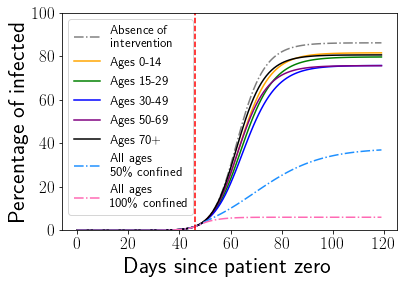

In [115]:
# Mean time to isolation 4.6 and 50% of age category removed
t_lockdown_vec = [46]
sim_end = 119
today = 67
group_vec_age = ['0-14','15-29','30-49','50-69','70+']

combo_start = 0
combo_end = 10
pop_size = 10000000

filename1 = 'lombardy_distributed_agepolicy_0_paramsweep_n10000000.0_i'
filename2 = 'lombardy_distributed_agepolicy_1_paramsweep_n10000000.0_i'

folder1 = 'perc_policy_results/run1/'
folder2 = 'perc_policy_results/run2/'
option = 2
specific_title = ''

perc_infected_age_group_node_removal(pop_size, group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder1, folder2, filename1, filename2, option, specific_title)

## Figure 8(c)

Baseline 0: No intervention
# of deaths on lockdown day:  177.07
# of deaths today:  23282.59
# of deaths at the end of the simulation:  391323.13
Age group:  0-14
# of deaths on lockdown day:  184.67
# of deaths today :  21852.42
# of deaths at the end of the simulation:  375371.79
Age group:  15-29
# of deaths on lockdown day:  179.88
# of deaths today :  20687.88
# of deaths at the end of the simulation:  368805.88
Age group:  30-49
# of deaths on lockdown day:  177.35
# of deaths today :  19241.45
# of deaths at the end of the simulation:  352554.09
Age group:  50-69
# of deaths on lockdown day:  181.65
# of deaths today :  19407.39
# of deaths at the end of the simulation:  309389.45
Age group:  70+
# of deaths on lockdown day:  182.27
# of deaths today :  19301.26
# of deaths at the end of the simulation:  282918.96
Baseline:  1
# of deaths on lockdown day:  181.54
# of deaths today:  10615.51
# of deaths at the end of the simulation:  109251.04
Baseline:  2
# of deaths on lockdo

<module 'matplotlib.pyplot' from 'C:\\Users\\Marie CHARPIGNON\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

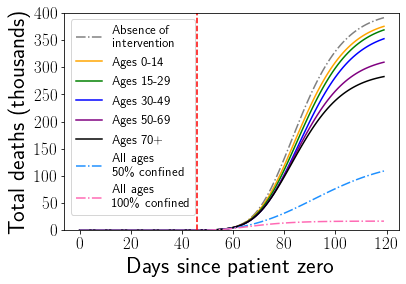

In [107]:
# Mean time to isolation 4.6 and 50% of age category removed
t_lockdown_vec = [46]
sim_end = 119
today = 67
group_vec_age = ['0-14','15-29','30-49','50-69','70+']

combo_start = 0
combo_end = 10
pop_size = 10000000

filename1 = 'lombardy_distributed_agepolicy_0_paramsweep_n10000000.0_i'
filename2 = 'lombardy_distributed_agepolicy_1_paramsweep_n10000000.0_i'

folder1 = 'perc_policy_results/run1/'
folder2 = 'perc_policy_results/run2/'
option = 2
#specific_title = 'Mean Time to Isolation = 4.6 days for all' + '\n50% stay home, per age group'
specific_title = ''

death_age_group_node_removal( group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder1, folder2, filename1, filename2, option, specific_title)

## Figure 8(b)

Baseline 0: No intervention
% infected on lockdown day:  1.6968067999999998
% infected today:  58.381816799999996
% infected at the end of the simulation:  86.2451102
Age group:  0-14
% infected on lockdown day:  1.6197347
% infected today:  43.4403242
% infected at the end of the simulation:  77.1060876
Age group:  15-29
% infected on lockdown day:  1.7788489
% infected today:  37.4307764
% infected at the end of the simulation:  72.7434731
Age group:  30-49
% infected on lockdown day:  1.8419314999999998
% infected today:  31.8929594
% infected at the end of the simulation:  64.1060383
Age group:  50-69
% infected on lockdown day:  1.6201382
% infected today:  41.5542953
% infected at the end of the simulation:  66.154406
Age group:  70+
% infected on lockdown day:  1.8060544
% infected today:  53.3265709
% infected at the end of the simulation:  75.58195049999999
Baseline:  1
% infected on lockdown day:  1.7408981000000001
% infected today:  15.413509
% infected at the end of the si

<module 'matplotlib.pyplot' from 'C:\\Users\\Marie CHARPIGNON\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

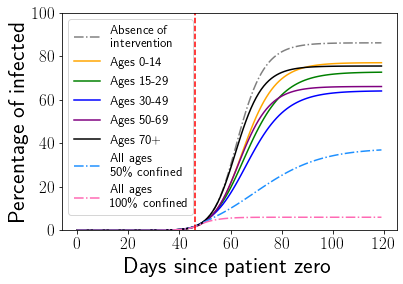

In [108]:
# Mean time to isolation 4.6 and 100% of age category removed
t_lockdown_vec = [46]
n_sims = 100
sim_end = 119
today = 67
group_vec_age = ['0-14','15-29','30-49','50-69','70+']

combo_start = 0
combo_end = 10
pop_size = 10000000

filename1 = 'lombardy_distributed_agepolicy_0_paramsweep_n10000000.0_i'
filename2 = 'lombardy_distributed_agepolicy_1_paramsweep_n10000000.0_i'

folder1 = 'perc_policy_results/run1/'
folder2 = 'perc_policy_results/run2/'
option = 1
specific_title = ''

perc_infected_age_group_node_removal(pop_size, group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder1, folder2, filename1, filename2, option, specific_title)

## Figure 8(d)

Baseline 0: No intervention
# of deaths on lockdown day:  177.07
# of deaths today:  23282.59
# of deaths at the end of the simulation:  391323.13
Age group:  0-14
# of deaths on lockdown day:  167.21
# of deaths today:  18737.73
# of deaths at the end of the simulatuon:  18737.73
Age group:  15-29
# of deaths on lockdown day:  183.14
# of deaths today:  18807.37
# of deaths at the end of the simulatuon:  18807.37
Age group:  30-49
# of deaths on lockdown day:  190.95
# of deaths today:  17133.46
# of deaths at the end of the simulatuon:  17133.46
Age group:  50-69
# of deaths on lockdown day:  167.28
# of deaths today:  15079.61
# of deaths at the end of the simulatuon:  15079.61
Age group:  70+
# of deaths on lockdown day:  186.72
# of deaths today:  16142.77
# of deaths at the end of the simulatuon:  16142.77
Baseline:  1
# of deaths on lockdown day:  181.54
# of deaths today:  10615.51
# of deaths at the end of the simulation:  109251.04
Baseline:  2
# of deaths on lockdown day:  1

<module 'matplotlib.pyplot' from 'C:\\Users\\Marie CHARPIGNON\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

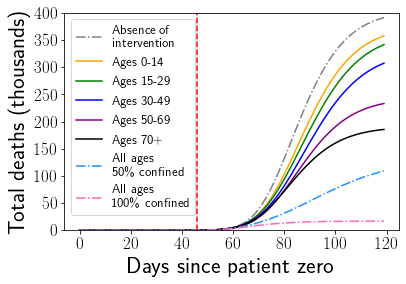

In [109]:
# Mean time to isolation 4.6 and 100% of age category removed
t_lockdown_vec = [46]
n_sims = 100
sim_end = 119
today = 67
group_vec_age = ['0-14','15-29','30-49','50-69','70+']

combo_start = 0
combo_end = 10
pop_size = 10000000

filename1 = 'lombardy_distributed_agepolicy_0_paramsweep_n10000000.0_i'
filename2 = 'lombardy_distributed_agepolicy_1_paramsweep_n10000000.0_i'

folder1 = 'perc_policy_results/run1/'
folder2 = 'perc_policy_results/run2/'
option = 1
specific_title = ''

death_age_group_node_removal(group_vec_age,t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder1, folder2, filename1, filename2, option, specific_title)

## Figure 9(a)

Baseline 0: No intervention
% infected on lockdown day:  1.6968067999999998
% infected today:  58.381816799999996
% infected at the end of the simulation:  86.2451102
Age group:  0-14
% infected on lockdown day:  1.7398521
% infected today:  21.181542799999995
% infected at the end of the simulation:  56.395530900000004
Age group:  15-29
% infected on lockdown day:  1.6304800000000002
% infected today:  18.7859209
% infected at the end of the simulation:  51.544933199999996
Age group:  30-49
% infected on lockdown day:  1.775183
% infected today:  18.767615900000003
% infected at the end of the simulation:  49.557410000000004
Age group:  50-69
% infected on lockdown day:  1.8384998
% infected today:  22.3788462
% infected at the end of the simulation:  54.214534400000005
Age group:  70+
% infected on lockdown day:  1.5933061
% infected today:  23.2123129
% infected at the end of the simulation:  60.421565
Baseline:  1
% infected on lockdown day:  1.7408981
% infected today:  15.4135090

<module 'matplotlib.pyplot' from 'C:\\Users\\Marie CHARPIGNON\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

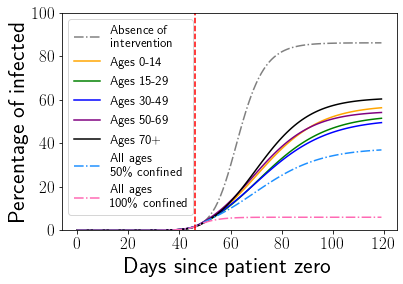

In [110]:
# Mean time to isolation 4.6 and 50% of age category removed
t_lockdown_vec = [46]
n_sims = 100
sim_end = 119
# As of March 29 of 2020
today = 67
group_vec_age = ['0-14','15-29','30-49','50-69','70+']

combo_start = 0
combo_end = 10
pop_size = 10000000

filename = 'lombardy_distributed_agepolicy_yeslockdown_0_paramsweep_n10000000.0_i'
folder = 'lockdown_perc_policy_results/'
option = 2
specific_title = ''

perc_infected_age_group_node_removal_lockdown(pop_size, group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder, filename, option, specific_title)

## Figure 9(c)

Baseline 0: No intervention
# of deaths on lockdown day 177.07
# of deaths today:  23282.59
# of deaths at the end of the simulation:  391323.13
Age group:  0-14
# deaths today  12671.25
# of deaths on lockdown day:  180.43
# of deaths at the end of the simulation:  181812.24
Age group:  15-29
# deaths today  11715.06
# of deaths on lockdown day:  169.34
# of deaths at the end of the simulation:  163234.5
Age group:  30-49
# deaths today  12294.35
# of deaths on lockdown day:  182.47
# of deaths at the end of the simulation:  160662.4
Age group:  50-69
# deaths today  12550.96
# of deaths on lockdown day:  193.65
# of deaths at the end of the simulation:  157192.73
Age group:  70+
# deaths today  11097.61
# of deaths on lockdown day:  164.16
# of deaths at the end of the simulation:  159588.9
Baseline:  1
# of deaths on lockdown day:  181.54
# of deaths today:  10615.51
# of deaths at the end of the simulation:  109251.04
Baseline:  2
# of deaths on lockdown day:  168.14
# of deaths to

<module 'matplotlib.pyplot' from 'C:\\Users\\Marie CHARPIGNON\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

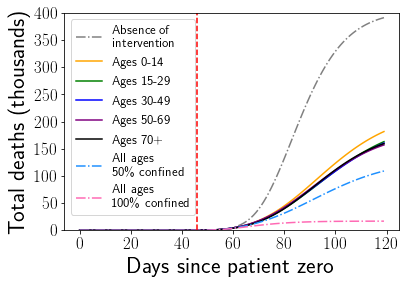

In [111]:
# Mean time to isolation 4.6 and 50% of age category removed
t_lockdown_vec = [46]
n_sims = 100
sim_end = 119
# As of March 29 of 2020
today = 67
group_vec_age = ['0-14','15-29','30-49','50-69','70+']

combo_start = 0
combo_end = 10
pop_size = 10000000

filename = 'lombardy_distributed_agepolicy_yeslockdown_0_paramsweep_n10000000.0_i'
folder = 'lockdown_perc_policy_results/'
option = 2
specific_title = ''

death_age_group_node_removal_lockdown(group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder, filename, option, specific_title)

## Figure 9(b)

Baseline 0: No intervention
% infected on lockdown day:  1.6968067999999998
% infected today:  58.381816799999996
% infected at the end of the simulation:  86.2451102
Age group:  0-14
% infected on lockdown day:  1.8065115
% infected today:  19.1857356
% infected at the end of the simulation:  50.178790299999996
Age group:  15-29
% infected on lockdown day:  1.6362903000000002
% infected today:  15.721416499999998
% infected at the end of the simulation:  41.6285776
Age group:  30-49
% infected on lockdown day:  1.8073751999999998
% infected today:  14.9254086
% infected at the end of the simulation:  36.5143793
Age group:  50-69
% infected on lockdown day:  1.7346146999999998
% infected today:  18.5354506
% infected at the end of the simulation:  45.582420199999994
Age group:  70+
% infected on lockdown day:  1.8074373000000001
% infected today:  23.982780499999997
% infected at the end of the simulation:  57.7097835
Baseline:  1
% infected on lockdown day:  1.7408981000000001
% infec

<module 'matplotlib.pyplot' from 'C:\\Users\\Marie CHARPIGNON\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

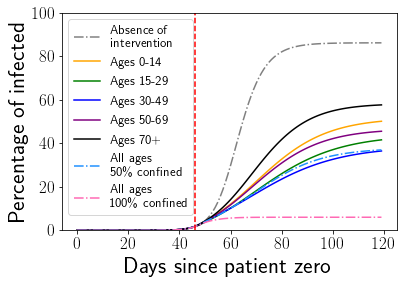

In [112]:
# Mean time to isolation 4.6 and 100% of age category removed
t_lockdown_vec = [46]
n_sims = 100
sim_end = 119
today = 67
group_vec_age = ['0-14','15-29','30-49','50-69','70+']

combo_start = 0
combo_end = 10
pop_size = 10000000

filename = 'lombardy_distributed_agepolicy_yeslockdown_0_paramsweep_n10000000.0_i'

folder = 'lockdown_perc_policy_results/'
option = 1
# Lombardy - Time of Lockdown = 46 days\n, \nInfected = Mild+Severe+Critical+R+D
#specific_title = 'Mean Time to Isolation = 4.6 days for all' + '\n100% stay home, per age group' + '\n+ Social distance increased by a factor of 2'
specific_title = ''

perc_infected_age_group_node_removal_lockdown(pop_size, group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder, filename, option, specific_title)

## Figure 9(d)

Baseline: No intervention
# of deaths on lockdown day:  177.07
# deaths today:  23282.59
# of deaths at the end of the simulation:  391323.13
Age group:  0-14
# of deaths on lockdown day:  187.1
# deaths today:  12563.18
# of deaths at the end of the simulation:  161180.6
Age group:  15-29
# of deaths on lockdown day:  172.06
# deaths today:  11148.6
# of deaths at the end of the simulation:  130288.96
Age group:  30-49
# of deaths on lockdown day:  189.17
# deaths today:  11526.93
# of deaths at the end of the simulation:  121694.56
Age group:  50-69
# of deaths on lockdown day:  178.43
# deaths today:  10765.52
# of deaths at the end of the simulation:  113655.13
Age group:  70+
# of deaths on lockdown day:  186.92
# deaths today:  11206.8
# of deaths at the end of the simulation:  121200.1
Baseline:  1
# of deaths on lockdown day: 181.54
# of deaths today: 10615.51
# of deaths at the end of the simulation: 109251.04
Baseline:  2
# of deaths on lockdown day: 168.14
# of deaths today:

<module 'matplotlib.pyplot' from 'C:\\Users\\Marie CHARPIGNON\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

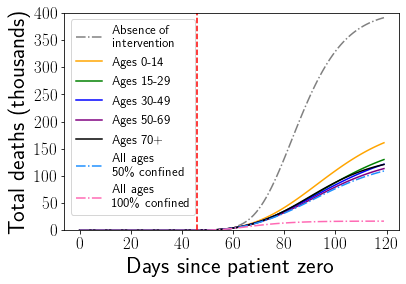

In [113]:
# Mean time to isolation 4.6 and 100% of age category removed
t_lockdown_vec = [46]
n_sims = 100
sim_end = 119
today = 67
group_vec_age = ['0-14','15-29','30-49','50-69','70+']

combo_start = 0
combo_end = 10
pop_size = 10000000

filename = 'lombardy_distributed_agepolicy_yeslockdown_0_paramsweep_n10000000.0_i'

folder = 'lockdown_perc_policy_results/'
option = 1
specific_title = ''

death_age_group_node_removal_lockdown(group_vec_age, t_lockdown_vec, n_sims, sim_end, today, combo_start, combo_end, folder, filename, option, specific_title)